# Explore here

In [1]:
# Your code here
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.to_csv('../data/raw/raw_.csv',index=False)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Revision de datos
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()  #Revisar y eliminar nulos
df.drop_duplicates().reset_index(drop=True)  #Eliminar duplicados

df

,age,sex,bmi,children,smoker,region,charges,sex_n,smoker_n,region_n
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,1,2
1334,18,female,31.920,0,no,northeast,2205.98080,0,1,3
1335,18,female,36.850,0,no,southeast,1629.83350,0,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,0,1,0


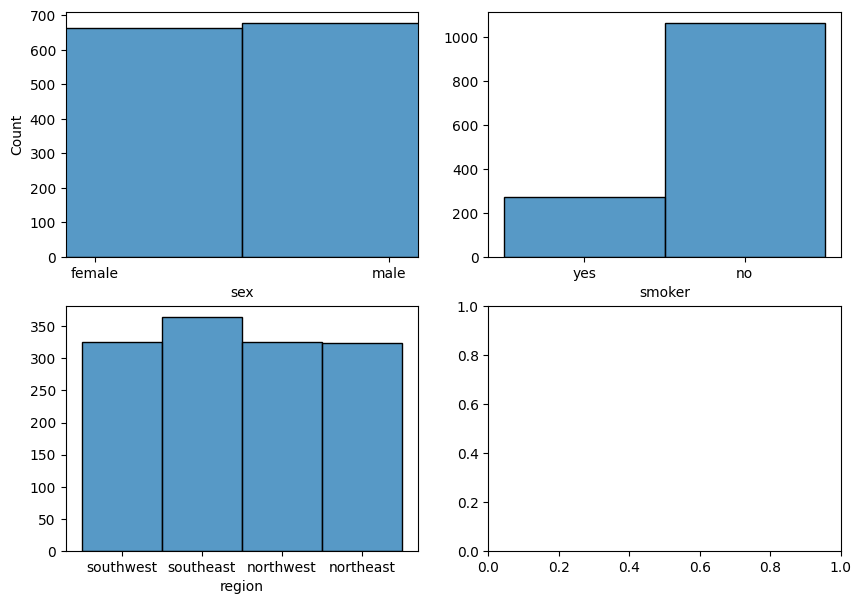

In [9]:
#EDA
#Datos Categoricos
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "sex").set_xlim(-0.1, 1.1)
sns.histplot(ax = axis[0, 1], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "region").set(ylabel = None)
plt.show()


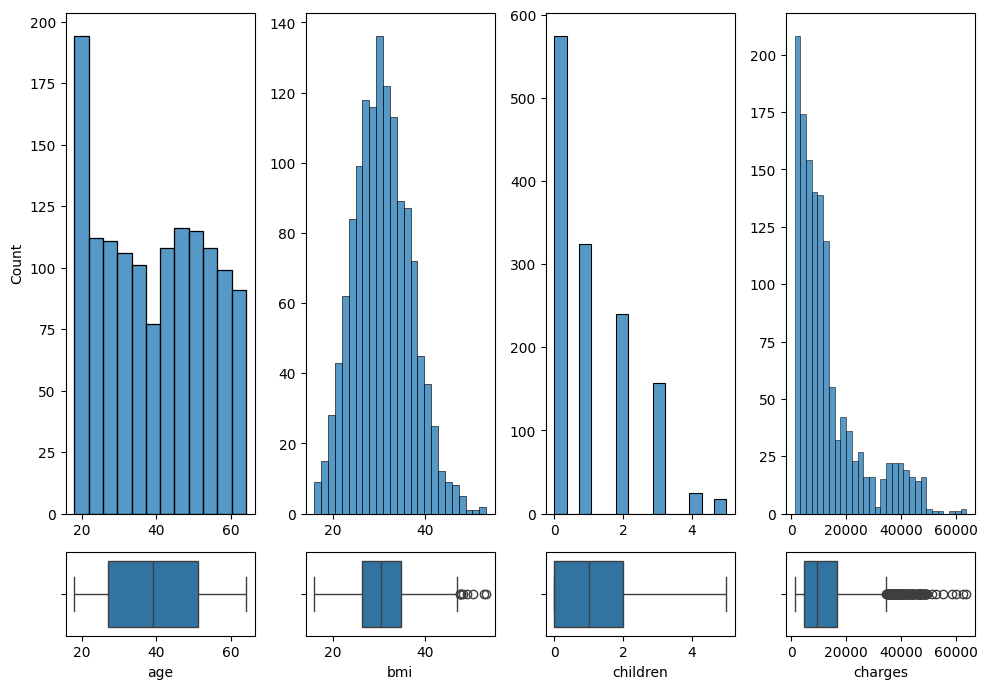

In [16]:
#Datos Numericos
fig, axis = plt.subplots(2, 4, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "age")

sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")

sns.histplot(ax = axis[0, 2], data = df, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "children")

sns.histplot(ax = axis[0, 3], data = df, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 3], data = df, x = "charges")

plt.tight_layout()
plt.show()

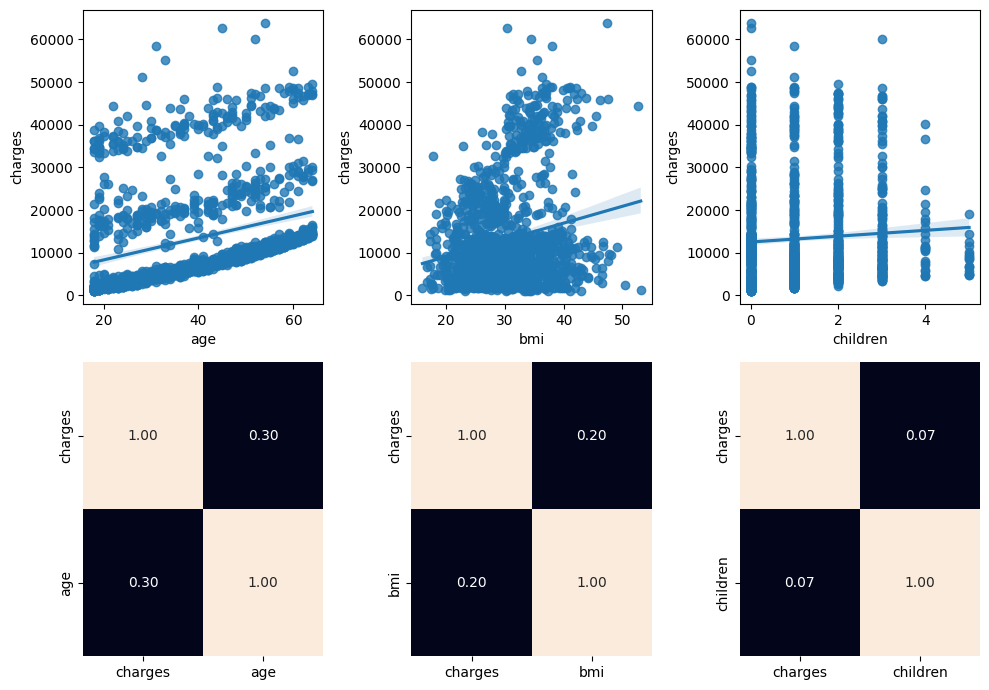

In [19]:
#Analisis Multivariante
#Numerico-Numerico
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = df, x = "age", y = "charges")
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = df, x = "children", y = "charges")
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()
plt.show()

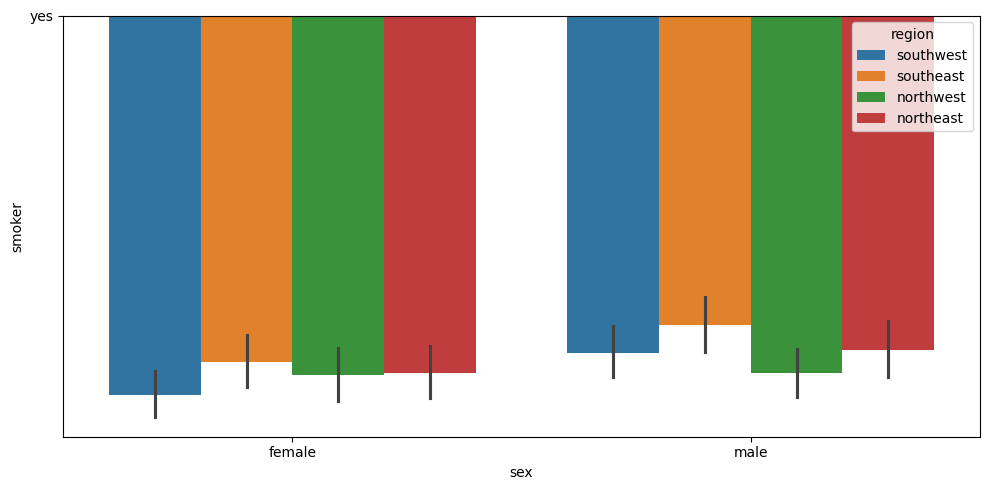

In [28]:
#Categorico-Categorico
fig, axis = plt.subplots(figsize = (10, 5))

sns.barplot(data = df, x = "sex", y = "smoker", hue = "region")

plt.tight_layout()
plt.show()

# Variable 'region' es relativamente homogenea tanto distribuida por sexo como por fumadores. Se decide eliminar como informacion no relevante.

In [8]:
#Escalado
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas,index=df.index,columns=num_variables)
df_escalado


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,1.0,1.0,0.666667,0.151299
1334,0.000000,0.429379,0.0,0.0,1.0,1.000000,0.017305
1335,0.000000,0.562012,0.0,0.0,1.0,0.333333,0.008108
1336,0.065217,0.264730,0.0,0.0,1.0,0.000000,0.014144


In [11]:
#Dividir Train y Test
from sklearn.model_selection import train_test_split
X=df_escalado.drop('charges',axis=1)
y= df['charges']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

NameError: name 'df_escalado' is not defined

In [12]:
#Modelo de regresion lineal
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(X_train, y_train)


NameError: name 'X_train' is not defined

In [ ]:
#Imprimir intercepto y coeficientes
print(f'Intercepto(a): {model.intercept_}')
print(f'Coeficientes(b): {model.coef_}')


In [ ]:
#Predecir modelos
y_pred= model.predict(X_test)
y_pred

In [ ]:
#Metricas
from sklearn.metrics import mean_squared_error, r2_score
print(f'MSE:{mean_squared_error(y_test,y_pred)}')
print(f'R2:{r2_score(y_test,y_pred)}')